<a href="https://colab.research.google.com/github/faisalalh1122/BootCampT5/blob/main/TimeSeriesTask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Forecasting Exam

In this exam, you will work on a time series forecasting task. The goal is to go through the entire workflow from loading the data to evaluating the model and making predictions. Follow each step carefully. The dataset is stored in you can access it [here](https://www.kaggle.com/datasets/khaledzsa/traffic-dataset), the target is to predict `traffic_volume` column. There is also command to download the dataset below.

## Dataset: Traffic Dataset

### Dataset Overview:

- **Name**: Traffic Dataset
- **Description**: This dataset contains hourly data on the traffic volume for westbound I-94, a major interstate highway in the US that connects Minneapolis and St Paul, Minnesota. The data was collected by the Minnesota Department of Transportation (MnDOT) from 2012 to 2018 at a station roughly midway between the two cities.
- **Time Period**: Starting from 18-11-2016
- **Frequency**: Hourly observations

### Features:

1. **temp:** a numeric variable that shows the average temperature in kelvin.
2. **rain_1h:** a numeric variable that shows the amount of rain in mm that occurred in the hour.
3. **snow_1h:** a numeric variable that shows the amount of snow in mm that occurred in the hour.
4. **clouds_all:** a numeric variable that shows the percentage of cloud cover.
5. **weather_main:** a categorical variable that gives a short textual description of the current weather (such as Clear, Clouds, Rain, etc.).
6. **weather_description:** a categorical variable that gives a longer textual description of the current weather (such as light rain, overcast clouds, etc.).
7. **date_time:** a datetime variable that shows the hour of the data collected in local CST time.
8. **traffic_volume:** a numeric variable that shows the hourly I-94 reported westbound traffic volume.

#### Feel free to add or rearrange steps as you see fit to optimize your workflow. One additional note: the model's performance doesn't need to be 100% accurate. Instead, focus on achieving the best possible results while balancing performance and generalization.

## Load the Data

Load the time series dataset into a pandas DataFrame.

**Instructions:**
- Use `pandas` to load your dataset.
- Display the first few rows to understand its structure.
- Make sure the datetime column is correctly parsed.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('Traffic.csv')
df.head()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
0,1209.0,291.15,0.0,0.0,90,Mist,mist,2017-08-27 01:00:00
1,1248.0,286.01,0.0,0.0,1,Clear,sky is clear,2018-09-06 23:00:00
2,4602.0,293.69,0.0,0.0,75,Clouds,broken clouds,2017-08-25 18:00:00
3,2838.0,262.35,0.0,0.0,1,Clear,sky is clear,2017-11-09 22:00:00
4,5794.0,267.08,0.0,0.0,5,Clear,sky is clear,2017-11-09 15:00:00


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   traffic_volume       19980 non-null  float64
 1   temp                 20000 non-null  float64
 2   rain_1h              20000 non-null  float64
 3   snow_1h              20000 non-null  float64
 4   clouds_all           20000 non-null  int64  
 5   weather_main         20000 non-null  object 
 6   weather_description  20000 non-null  object 
 7   date_time            20000 non-null  object 
dtypes: float64(4), int64(1), object(3)
memory usage: 1.2+ MB


In [ ]:

df['date_time'] = pd.to_datetime(df['date_time'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   traffic_volume       19980 non-null  float64       
 1   temp                 20000 non-null  float64       
 2   rain_1h              20000 non-null  float64       
 3   snow_1h              20000 non-null  float64       
 4   clouds_all           20000 non-null  int64         
 5   weather_main         20000 non-null  object        
 6   weather_description  20000 non-null  object        
 7   date_time            20000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(1), object(2)
memory usage: 1.2+ MB


In [ ]:

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['weather_main'] = le.fit_transform(df['weather_main'])
df['weather_description'] = le.fit_transform(df['weather_description'])
df.head()


,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
0,1209.0,291.15,0.0,0.0,90,5,16,2017-08-27 01:00:00
1,1248.0,286.01,0.0,0.0,1,0,25,2018-09-06 23:00:00
2,4602.0,293.69,0.0,0.0,75,1,1,2017-08-25 18:00:00
3,2838.0,262.35,0.0,0.0,1,0,25,2017-11-09 22:00:00
4,5794.0,267.08,0.0,0.0,5,0,25,2017-11-09 15:00:00


## Exploratory Data Analysis (EDA)

Perform exploratory data analysis on the dataset.

**Instructions:**
- Plot the time series data.
- Analyze trends, seasonality, and potential outliers.
- Plot boxplots or scatter plots to identify any outliers or anomalies in the data.
- Seasonal Decomposition: Use `seasonal_decompose` from the `statsmodels` library to break down the time series data into trend, seasonality, and residual components. Analyze each component to gain insights into the long-term movement (trend), regular patterns (seasonality), and remaining fluctuations (residuals).

Do more if needed!

In [ ]:
df = df.sort_values(by='date_time')
ts_df = df.set_index('date_time')

In [ ]:
ts_df = ts_df.resample('M').mean()

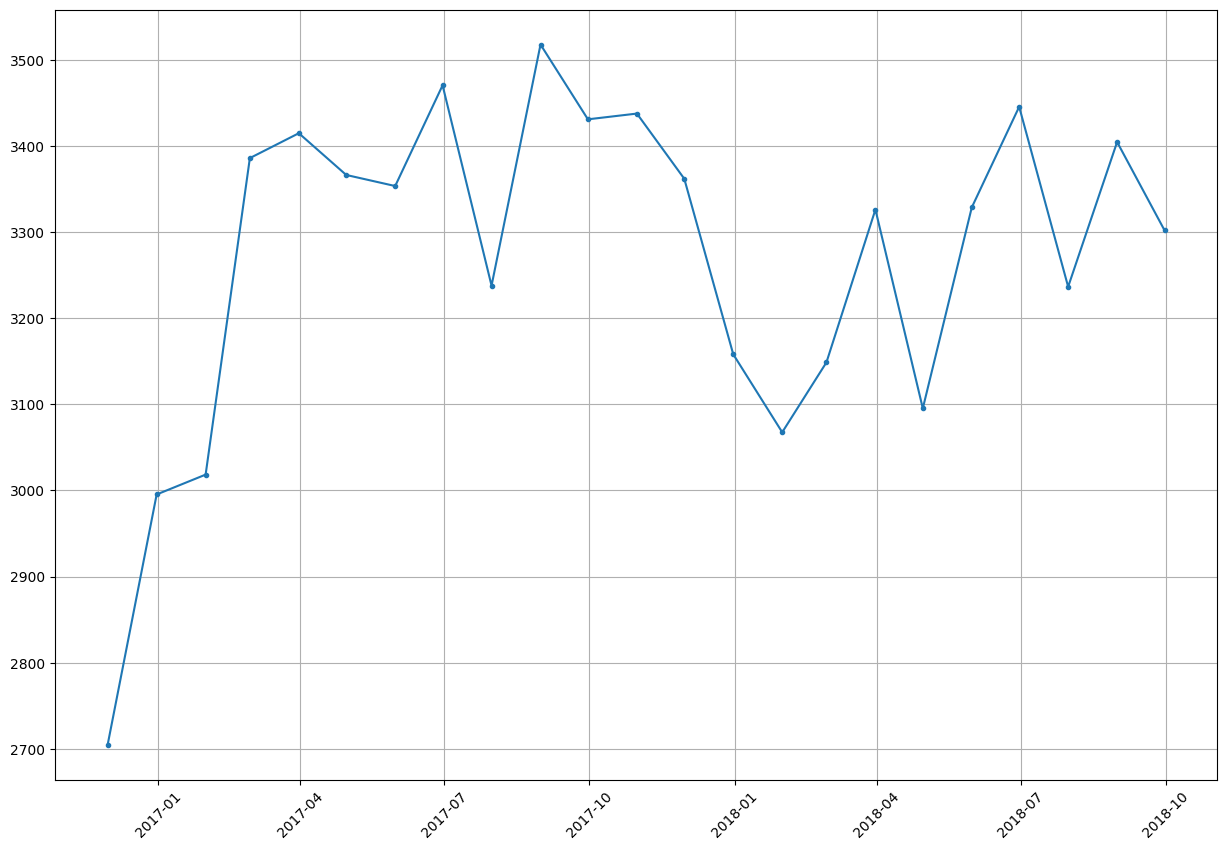

In [ ]:

plt.figure(figsize=(15,10))
plt.plot(ts_df.index,ts_df['traffic_volume'], marker='.')
plt.xticks(rotation=45)
plt.grid(True)

In [ ]:
df.isnull().sum()

,0
traffic_volume,20
temp,0
rain_1h,0
snow_1h,0
clouds_all,0
weather_main,0
weather_description,0
date_time,0


In [ ]:
df.dropna(inplace=True)


In [ ]:
df.isnull().sum()

,0
traffic_volume,0
temp,0
rain_1h,0
snow_1h,0
clouds_all,0
weather_main,0
weather_description,0
date_time,0


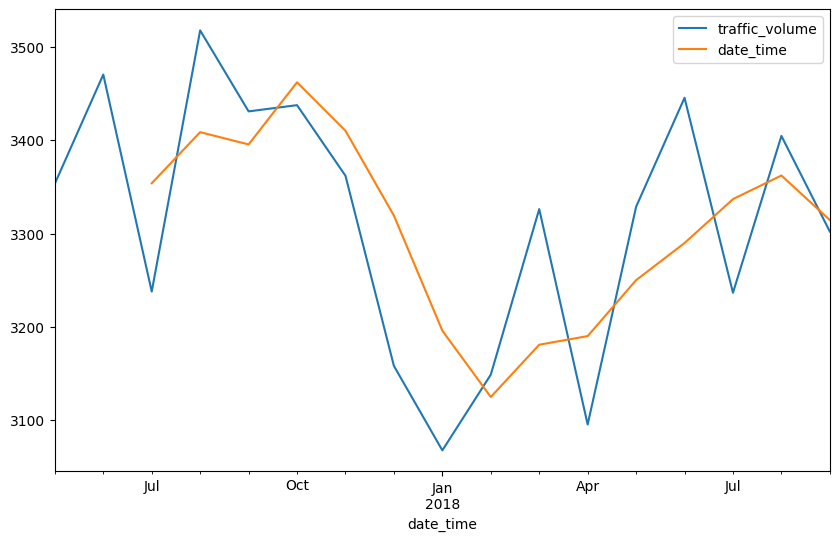

In [ ]:
ts_df['date_time'] = ts_df['traffic_volume'].rolling(window=3).mean()
ts_df[['traffic_volume', 'date_time']].plot(figsize=(10, 6))
plt.show()


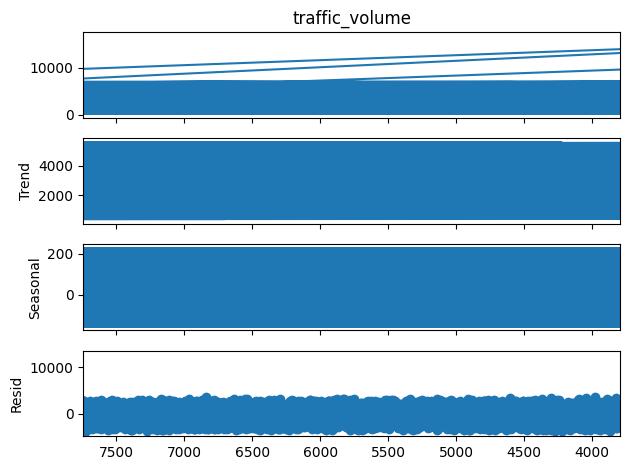

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df['traffic_volume'], model='additive', period=24)
result.plot()
plt.show()

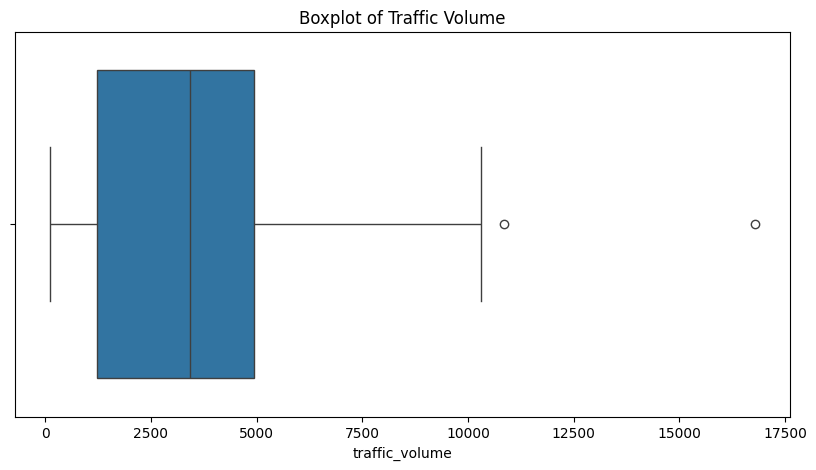

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['traffic_volume'])
plt.title('Boxplot of Traffic Volume')
plt.show()

## Data Preprocessing

Clean and preprocess the data.

**Instructions:**
- Handle any missing values in the dataset.
- If necessary, resample the data to ensure consistent time intervals.
- Create any additional features needed, such as lags or moving averages.
- Make sure that the dates are sorted correctly.

Do more if needed!

In [ ]:
# i did some of these above

In [ ]:
ts_df.describe()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description
count,23.000000,23.000000,23.000000,23.0,23.000000,23.000000,23.000000
mean,3270.040630,281.003909,0.044798,0.0,49.405823,2.758236,16.463144
std,194.312491,11.418035,0.151716,0.0,9.729853,0.634326,0.874071
min,2704.857143,263.955236,0.000000,0.0,33.862353,1.600840,14.573386
25%,3153.464949,272.393562,0.000000,0.0,41.313230,2.323236,15.754471
50%,3328.735936,282.211880,0.000000,0.0,50.955378,2.657240,16.551646
75%,3409.839837,291.836670,0.000000,0.0,55.209690,3.043800,17.218731
max,3517.937500,295.475247,0.619401,0.0,72.440313,4.264188,17.741738


## Feature Engineering

### Instructions:
  
- **Shift Method**: Use the `shift` method to create a new column `prev_traffic_volume`, which represents the previous day's traffic volume.

- **Difference between traffic_volume**: Calculate the difference between the values in `traffic_volume` column to highlight short-term volume.

- **Date Features**: Extract meaningful time-based features from the `date_time` column to enhance the model's ability to detect temporal patterns. These features include:
  - **Day of the week**: To capture weekly seasonality.
  - **Month**: To capture monthly trends.
  - **Day of the year**: Useful for modeling yearly seasonality.


In [ ]:
lags = []
for i in range(1, 6):
    ts_df[f'Lag_{i}'] = ts_df['traffic_volume'].shift(i)
    lags.append(f'Lag_{i}')


ts_df.dropna(inplace=True)


In [ ]:
ts_df['Day_of_the_week']= ts_df.index.day_of_week
ts_df['Month'] = ts_df.index.month
ts_df['Day_of_the_year'] = ts_df.index.day_of_year
ts_df['isWeeked']= ts_df['Day_of_the_week'] >= 5


ts_df['ff']= ts_df['Day_of_the_week'].diff()

In [ ]:
ts_df.dropna(inplace=True)

## Train-Test Split

Split the dataset into training and testing sets.

**Instructions:**
- Ensure the split maintains the time order of the data.
- Decide on an appropriate ratio for splitting the data.

In [ ]:
from sklearn.model_selection import train_test_split

X = ts_df.drop(columns=['traffic_volume'])
y = ts_df['traffic_volume']

X_train,X_test,y_train,y_test = train_test_split(X,y, random_state=42,test_size=0.2,shuffle=False)

## Feature Scaling

Apply feature scaling to the data if needed.

**Instructions:**
- Use a scaling method such as MinMaxScaler or StandardScaler.
- Ensure scaling is applied correctly to both training and testing data.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:

scaler = MinMaxScaler()
y_train_scaled = scaler.fit_transform(y_train)
y_test_scaled = scaler.transform(y_test)


ValueError: Expected 2D array, got 1D array instead:
array=[3353.58508403 3470.57300613 3237.8869258  3517.9375     3431.07950311
 3437.7575431  3362.04166667 3158.14755959 3067.57870895 3148.78233831
 3326.28356481 3095.32594235 3328.73593571].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
scaler = MinMaxScaler()
y_train_reshaped = y_train.values.reshape(-1, 1)
y_train_scaled = scaler.fit_transform(y_train_reshaped)

y_test_reshaped = y_test.values.reshape(-1, 1)
y_test_scaled = scaler.transform(y_test_reshaped)

## Models Selection

Choose two models for time series forecasting.

**Instructions:**
- Select two models such as ARIMA, SARIMA, RNN, LSTM, or GRU.
- Train these models and then compare their performance.

### Model 1 Training

Train your first model on the training dataset.

**Instructions:**
- Fit the first model to the training data.
- Ensure to monitor the training process.

In [ ]:
from keras.models import Sequential
from keras.layers import SimpleRNN,Dense,Dropout,Input
from keras.callbacks import EarlyStopping

In [ ]:
model_rnn = Sequential([
    Input(shape=(X_train.shape[1],1)),
    SimpleRNN(units=50, return_sequences=True),
    Dropout(0.25),

    SimpleRNN(units=25),
    Dropout(0.25),

    Dense(units=1)
])

model_rnn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_2 (SimpleRNN)             │ (None, 16, 50)              │           2,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 16, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_3 (SimpleRNN)             │ (None, 25)                  │           1,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 25)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,526 (17.68 KB)

 Trainable params: 4,526 (17.68 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_rnn.compile(loss='mean_squared_error',optimizer='adam',metrics= ['mean_squared_error'])

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss',patience=15, restore_best_weights=True)

model_rnn.fit(X_train,y_train,epochs=100,validation_split=0.2,callbacks=early_stopping)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 11040974.0000 - mean_squared_error: 11040974.0000 - val_loss: 10578727.0000 - val_mean_squared_error: 10578727.0000
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 660ms/step - loss: 11039262.0000 - mean_squared_error: 11039262.0000 - val_loss: 10576663.0000 - val_mean_squared_error: 10576663.0000
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 11035589.0000 - mean_squared_error: 11035589.0000 - val_loss: 10574667.0000 - val_mean_squared_error: 10574667.0000
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 11033954.0000 - mean_squared_error: 11033954.0000 - val_loss: 10572780.0000 - val_mean_squared_error: 10572780.0000
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 11033027.0000 - mean_squared_error: 11033027.0000 - val_loss: 10571020.0000 - val_mean_squared_error: 10571020.0000
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 11030734.0000 - mean_squared_error: 11030734.0000 - val_loss: 10569361.00

### Make 1 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

In [ ]:
y_pred = model_rnn.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


### Model 1 Evaluation

Evaluate the performance of your first model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

<Axes: xlabel='date_time'>

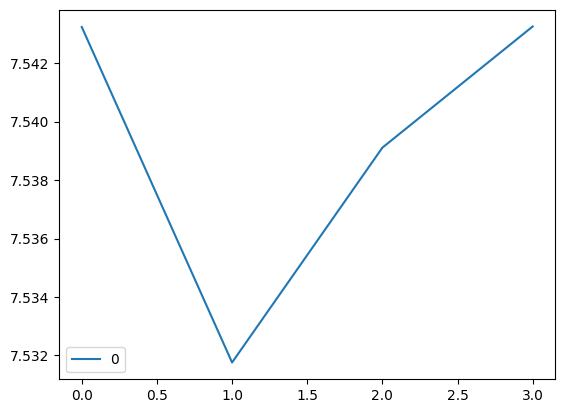

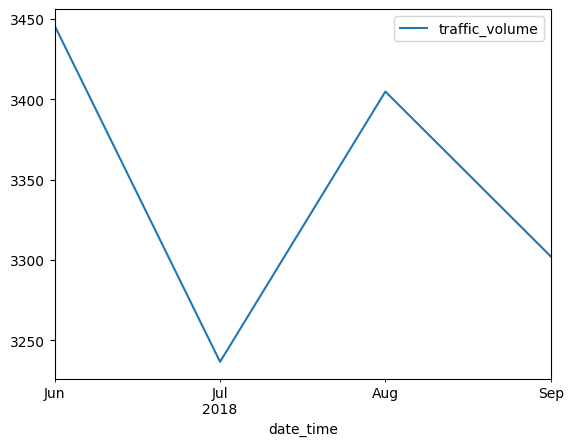

In [ ]:
pd.DataFrame(y_pred).plot()
pd.DataFrame(y_test).plot()

In [ ]:
y_train
# i did the scaling but !

,traffic_volume
date_time,
2017-05-31,3353.585084
2017-06-30,3470.573006
2017-07-31,3237.886926
2017-08-31,3517.937500
2017-09-30,3431.079503
2017-10-31,3437.757543
2017-11-30,3362.041667
2017-12-31,3158.147560
2018-01-31,3067.578709


In [ ]:
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse


print(mean_squared_error(y_pred,y_test))
print(rmse(y_pred,y_test))


11160834.670376066
[3438.10670678 3229.06436667 3397.20854003 3294.67456242]


### Model 2 Training

Train your second model on the training dataset.

**Instructions:**
- Fit the second model to the training data.
- Ensure to monitor the training process.

In [ ]:
# prompt: training using  ARIMA

from statsmodels.tsa.arima.model import ARIMA


p, d, q = 5, 1, 0
model_arima = ARIMA(y_train, order=(p, d, q))
model_arima_fit = model_arima.fit()

# Print model summary
print(model_arima_fit.summary())


                               SARIMAX Results                                
Dep. Variable:         traffic_volume   No. Observations:                   13
Model:                 ARIMA(5, 1, 0)   Log Likelihood                 -76.749
Date:                Sun, 25 Aug 2024   AIC                            165.499
Time:                        16:15:35   BIC                            168.408
Sample:                    05-31-2017   HQIC                           164.422
                         - 05-31-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6057      0.396     -1.531      0.126      -1.381       0.170
ar.L2         -0.1456      0.759     -0.192      0.848      -1.634       1.342
ar.L3         -0.1049      0.411     -0.255      0.7

### Make 2 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

In [ ]:

y_pred_arima = model_arima_fit.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1)


### Model 2 Evaluation

Evaluate the performance of your second model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

In [ ]:


import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae_arima = mean_absolute_error(y_test, y_pred_arima)
print('MAE:', mae_arima)


mse_arima = mean_squared_error(y_test, y_pred_arima)
print('MSE:', mse_arima)


rmse_arima = np.sqrt(mse_arima)
print('RMSE:', rmse_arima)


MAE: 142.6383161034089
MSE: 26660.5577508195
RMSE: 163.28061045580242


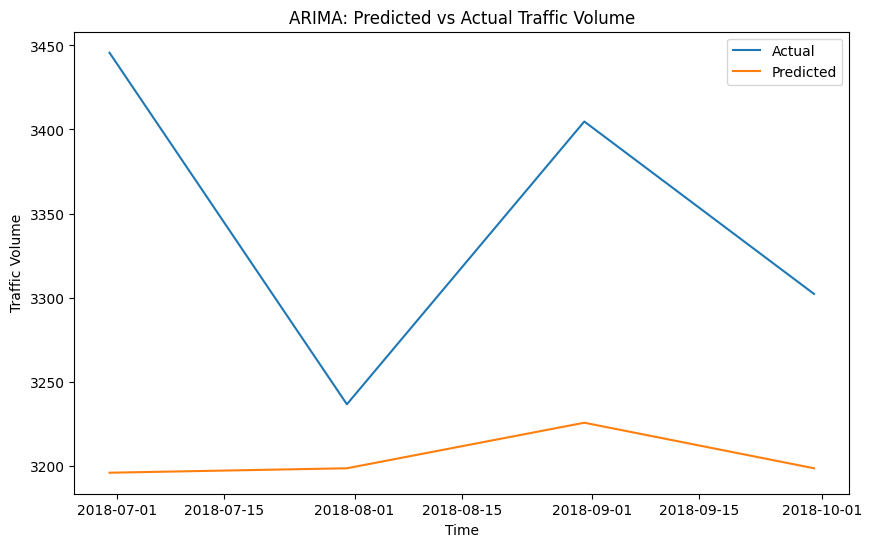

In [ ]:

plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_arima, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Traffic Volume')
plt.legend()
plt.show()


## Project Questions:

1. **Data Preprocessing**: Explain How you chose your specific data preprocessing techniques (e.g., normalization, handling missing values). How did these techniques help prepare the data for training the model?
2. **Feature Engineering**: Did you perform any feature engineering or transformations? Describe your decisions and how these new features (or transformed features) contributed to the forecasting model.
3. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the type of model, layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for time series forecasting?
4. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?
5. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics (e.g., MAE, RMSE, MAPE)? How do they align with the objective of forecasting?
6. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?
7. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?
8. **Future Improvements**: Suggest potential improvements or further steps you could take to enhance model performance. Consider using different algorithms, feature engineering techniques, or tuning hyperparameters.

### Answer Here:

1- Missing Values: Missing values were dropped using df.dropna  because number of null is only 20 beacuse .
Normalization: i used  MinMaxScaler to let the data between 0 and 1


2- i created lag features to incorporate previous traffic volumes as input features. we did  this with dr hassan . and features like day of the week and month and see if it is weekend or not.

3- RNN model with layers that handle time data well.

4- The model trained for 100 epochs with early stopping, Optimizer is  adam because it popular cause it adapt

6- ARIMA Parameters p=5, d=1, q=0).

7-  i didnt get a good result at all and i have some mistakes but i tried to solve it in the right way but the same reslut bad unfortunately.

8-  the right way to learn time sieres using machine learning not adeep learning . it will be easy to the students to understand and learn .